Using matplotlib backend: QtAgg
Populating the interactive namespace from numpy and matplotlib


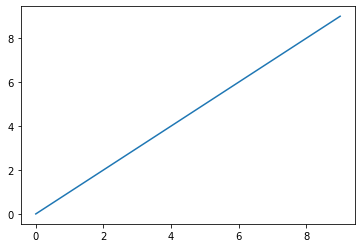

In [12]:
%pylab 
%matplotlib inline 
import pandas 

plot(arange(10))
# shift + enter 

In [13]:
from pandas import Series, DataFrame
import pandas as pd 

#멀티캠퍼스 주가
multicampus = Series([100,200,300,400,500])
type(multicampus)

pandas.core.series.Series

In [14]:
multicampus = Series([100,200,300,400,500], 
    index=["21-11-10","21-11-11","21-11-12","21-11-13","21-11-14"])

multicampus

21-11-10    100
21-11-11    200
21-11-12    300
21-11-13    400
21-11-14    500
dtype: int64

In [18]:
#2차원 행열 데이터
data = {"foreigner":[1,2,3,4,5,6], 
        "sratio":[10,20,30,40,50,60],
        "org":[100,200,300,400,500,600],
        "sprice":[1,2,3,4,5,6],
        "private":[10,20,30,40,50,60]
        }

frame = DataFrame(data, 
    columns=["private","org","foreigner","sratio","sprice"] ) 
type(frame)

pandas.core.frame.DataFrame

In [19]:
frame

,private,org,foreigner,sratio,sprice
0,10,100,1,10,1
1,20,200,2,20,2
2,30,300,3,30,3
3,40,400,4,40,4
4,50,500,5,50,5
5,60,600,6,60,6


In [20]:
frame2 = DataFrame(data, 
    columns=["private","org","foreigner","sratio","sprice"],
    index=["21-11-10","21-11-11","21-11-12","21-11-13","21-11-14","21-11-15"] ) 

frame2 

,private,org,foreigner,sratio,sprice
21-11-10,10,100,1,10,1
21-11-11,20,200,2,20,2
21-11-12,30,300,3,30,3
21-11-13,40,400,4,40,4
21-11-14,50,500,5,50,5
21-11-15,60,600,6,60,6


In [22]:
#슬라이싱(시리즈)
frame2["org"]

21-11-10    100
21-11-11    200
21-11-12    300
21-11-13    400
21-11-14    500
21-11-15    600
Name: org, dtype: int64

In [24]:
#행을 슬라이싱(location)
frame2.loc["21-11-11"]

private       20
org          200
foreigner      2
sratio        20
sprice         2
Name: 21-11-11, dtype: int64

In [25]:
frame2.T 

,21-11-10,21-11-11,21-11-12,21-11-13,21-11-14,21-11-15
private,10,20,30,40,50,60
org,100,200,300,400,500,600
foreigner,1,2,3,4,5,6
sratio,10,20,30,40,50,60
sprice,1,2,3,4,5,6


In [27]:
#데이터로 사용할 파일
!type c:\work\ex1.csv

id, name, price, description
1, iphone, 890000, iphone 6s 7 8 x 
2, android, 990000, samsung phone
3, winphone, 450000, microsoft winphone 


In [28]:
df1 = pd.read_csv("c:\\work\\ex1.csv")
df1 

,id,name,price,description
0,1,iphone,890000,iphone 6s 7 8 x
1,2,android,990000,samsung phone
2,3,winphone,450000,microsoft winphone


In [29]:
!type c:\work\ex2.csv 

1, iphone, 890000, iphone 6s 7 8 x 
2, android, 990000, samsung phone
3, winphone, 450000, microsoft winphone 


In [30]:
df2 = pd.read_csv("c:\\work\\ex2.csv", 
    names=["id","name","price","desc"])

df2 


,id,name,price,desc
0,1,iphone,890000,iphone 6s 7 8 x
1,2,android,990000,samsung phone
2,3,winphone,450000,microsoft winphone


In [31]:
!type c:\work\ex3.txt 

data1 data2 data3 
1.2     2.3     1.3
0.1     1.5     2.5
3.1     3.2     3.3


In [32]:
#정규표현식의 패턴을 사용(\s는 공백문자 +는 1~N번)
df3 = pd.read_table("c:\\work\\ex3.txt", sep="\s+")
df3 


,data1,data2,data3
0,1.2,2.3,1.3
1,0.1,1.5,2.5
2,3.1,3.2,3.3


(array([1., 1., 2., 3., 1., 1., 1.]),
 array([26.        , 28.57142857, 31.14285714, 33.71428571, 36.28571429,
        38.85714286, 41.42857143, 44.        ]),
 <BarContainer object of 7 artists>)

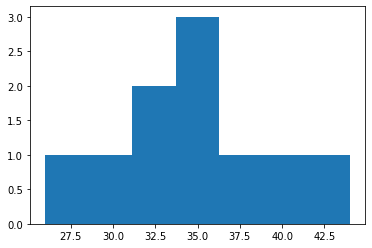

In [34]:
%pylab 
%matplotlib inline 

#엑셀 파일 읽기
dfExcel = pd.read_excel("c:\\work\\Demo.xlsx", "Sheet1")
#dfExcel 
#차트 그리기 
#비어 있는 그림판 
fig = plt.figure()
#그림판에 차트 추가(1행, 1열, 1차트)
ax = fig.add_subplot(1,1,1)
#수직 막대 그래프로 나이컬럼 7개 그룹으로 묶어서 그리기
ax.hist(dfExcel["나이"], bins=7)


In [36]:
#2개의 데이터를 비교해서 병합하는 경우(조각 데이터 )
df1 = DataFrame({"key":["b","b","a","c","a","a","b"],
                 "data1":range(7)
                })

#df1 

df2 = DataFrame({"key":["a","b","d"],
                 "data2":range(3)
                })

df2 

,key,data2
0,a,0
1,b,1
2,d,2


In [37]:
#병합하기
pd.merge(df1, df2, on="key")


,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [38]:
#2개의 데이터를 비교해서 병합하는 경우(조각 데이터 )
df3 = DataFrame({"lkey":["b","b","a","c","a","a","b"],
                 "data1":range(7)
                })

#df1 

df4 = DataFrame({"rkey":["a","b","d"],
                 "data2":range(3)
                })

df4 

,rkey,data2
0,a,0
1,b,1
2,d,2


In [39]:
pd.merge(df3, df4, left_on="lkey", right_on="rkey")


,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [40]:
#수직으로 결합(행단위)
s1 = Series([1,2])
s2 = Series([100,200,300])
pd.concat([s1,s2])


0      1
1      2
0    100
1    200
2    300
dtype: int64

Text(0.5, 1.0, '데모 차트')

C:\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
C:\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  func(*args, **kwargs)
C:\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
C:\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  func(*args, **kwargs)
C:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Py

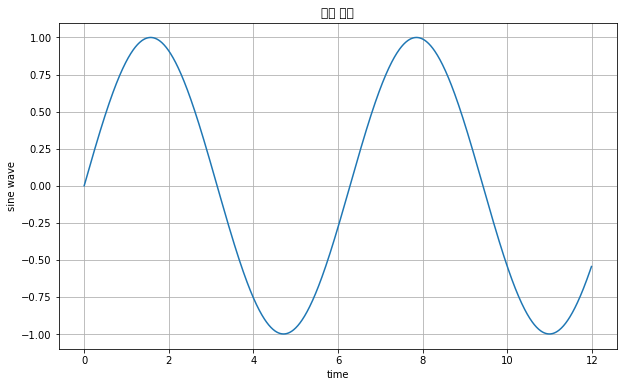

In [46]:
#차트 
import numpy as np 
t = np.arange(0, 12, 0.01)
y = np.sin(t)
plt.figure(figsize=(10,6))
plt.plot(t,y)
#꾸미기
plt.grid()
plt.ylabel("sine wave")
plt.xlabel("time")
plt.title("데모 차트")